In [1]:
from ROOT import TLorentzVector,  TVector3
from ROOT import Math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Welcome to JupyROOT 6.22/06


In [2]:
def thetaPhi():
    '''returns random theta and phi values'''
    theta = np.random.uniform(0,np.pi)
    phi = np.random.uniform(0,2*np.pi)
    return theta, phi

def momenta(mag, theta, phi):
    '''given an input magnitude, theta and phi the cartesian momenta are returned'''
    Px = mag * np.sin(phi) * np.cos(theta) 
    Py = mag * np.sin(phi) * np.sin(theta)
    Pz = mag * np.cos(phi)
    
    return Px, Py, Pz
    

def wArr(num):
    '''just for making numpy array of stationary w given the number of events'''
    momenta = np.zeros([num,4])
    momenta[:,3] = wMass
    
    return momenta

def vecToArr(vec):
    '''converts lorentzvector to array of components'''
    arr = np.zeros([4])
    arr[0] = vec.Px()
    arr[1] = vec.Py()
    arr[2] = vec.Pz()
    arr[3] = vec.E()
    
    return arr

In [3]:
def boostedW():
    '''produces numpy array of 4 momenta of w decay into electron and neutrino under a normally 
    distributed boost in z direction'''
    # defining constants
    event = np.zeros([3,4])
    wMass = 80.3
    eE = wMass / 2
    
    # making particles in w rest frame
    thetae, phie = thetaPhi()
    Px, Py, Pz = momenta(eE, thetae, phie)
    w = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(0,0,0, wMass)
    e = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(Px, Py, Pz, eE)
    n = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(-Px, -Py, -Pz, eE)
    
    # applying boost to all particles
    beta = np.random.normal(0,0.1) # beta (v/c) is noramlly distributed centred on 0 with width 0.1
    boostedW = Math.VectorUtil.boostZ(w, beta)
    wArr = vecToArr(boostedW)
    
    boostedE = Math.VectorUtil.boostZ(e, beta)
    eArr = vecToArr(boostedE)
    
    boostedN = Math.VectorUtil.boostZ(n, beta)
    nArr = vecToArr(boostedN)
    
    event[0] = wArr
    event[1] = eArr
    event[2] = nArr
    
    return event, beta

num = 10000
events = np.zeros([num, 3, 4])
beta = np.zeros([num])
#beta = 0.1

for i in range(num):
    events[i], beta[i] = boostedW()
    

blim, _ = boostedW()

print(blim[0] )
print(blim[1] + blim[2])
print(events[:3])

[ 0.          0.          0.2135997  80.30028409]
[ 0.          0.          0.2135997  80.30028409]
[[[  0.           0.          -5.46044946  80.48544283]
  [ 27.74241778 -27.9385397    5.1504231   39.70806723]
  [-27.74241778  27.9385397  -10.61087256  40.77737561]]

 [[  0.           0.         -12.40616049  81.25270961]
  [-27.44305461  10.77263295  21.37559168  36.41547455]
  [ 27.44305461 -10.77263295 -33.78175218  44.83723505]]

 [[  0.           0.          11.59248213  81.13245739]
  [  4.94241819   8.98267163  45.01756545  46.17030525]
  [ -4.94241819  -8.98267163 -33.42508332  34.96215214]]]


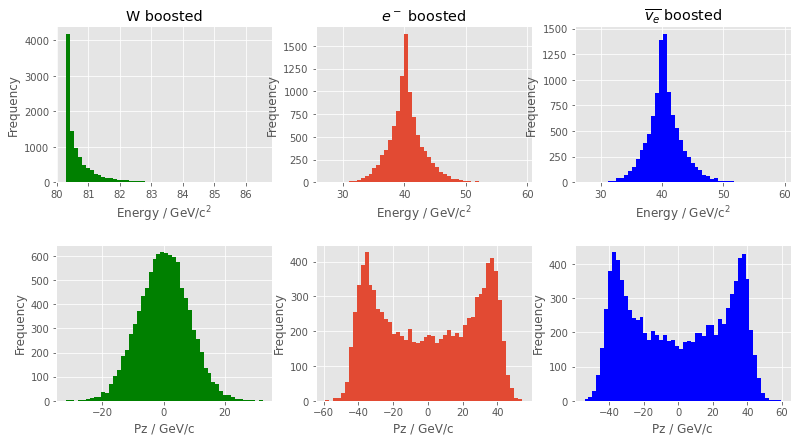

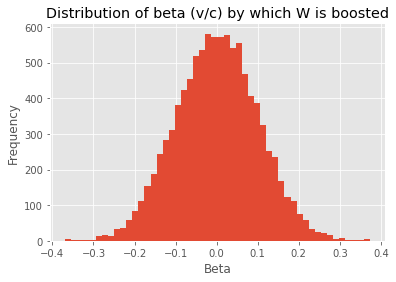

In [4]:
fig, ax = plt.subplots(2,3)
plt.subplots_adjust(left=0.0,bottom=0, right=1.7, top=1.3, wspace=0.2, hspace=0.4)

ax[0,0].hist(events[:,0,3], 50, color = 'g');
ax[0,1].hist(events[:,1,3], 50);
ax[0,2].hist(events[:,2,3], 50,color ='b');

ax[1,0].hist(events[:,0,2], 50,color = 'g');
ax[1,1].hist(events[:,1,2], 50);
ax[1,2].hist(events[:,2,2], 50,color ='b');

plt.setp(ax[0,:], xlabel='Energy / GeV/c$^2$')
plt.setp(ax[1,:], xlabel='Pz / GeV/c')
plt.setp(ax[:], ylabel='Frequency')


ax[0,0].title.set_text('W boosted')

ax[0,1].title.set_text('$e^-$ boosted')

ax[0,2].title.set_text('$ \overline{v_e} $ boosted')

plt.figure()
plt.title('Distribution of beta (v/c) by which W is boosted')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.hist(beta, 50);

In [47]:
def backToBack():
    ''' produces numpy array of 4 momenta of
    w pair with one hadronic decay and one leptonic decay'''
    event = np.zeros([6,4])
    # making back to back w bosons (stationary)
    wMass = 80.3
    
    wmag = 10# magnitude of w momentum
    
    theta, phi = thetaPhi()
    Px, Py, Pz = momenta(wmag, theta, phi)
    #print(Px, Py, Pz)
    
    m = Px**2 + Py**2 + Pz**2
    E = np.sqrt(m + wMass**2)

    w1 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(Px, Py, Pz, E)
    w2 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(-Px, -Py, -Pz, E)

    #boosting the Ws
    beta = np.random.normal(0,0.1)
    boostedW1 = Math.VectorUtil.boostZ(w1, beta)
    w1Arr = vecToArr(boostedW1)
    boostedW2 = Math.VectorUtil.boostZ(w2, beta)
    w2Arr = vecToArr(boostedW2)
    
#     w1Arr = vecToArr(w1)
#     w2Arr = vecToArr(w2)
#     boost1 = w1.BoostToCM()
#     boost2 = w2.BoostToCM()
    # have to make them into tlorentzvectors for the boostvector function to work

    boow1 = TLorentzVector()
    boow1.SetPxPyPzE(boostedW1.Px(), boostedW1.Py(), boostedW1.Pz(), boostedW1.E())
    boow2 = TLorentzVector()
    boow2.SetPxPyPzE(boostedW2.Px(), boostedW2.Py(), boostedW2.Pz(), boostedW2.E())

   # making boost vectors for the daughter particles of each w
    boost1 = boow1.BoostVector()
    boost2 = boow2.BoostVector()

#     boost1=  TVector3()
#     #boost2=  TVector3()
    
#     boost1.SetXYZ(boostedW1.Px()/ boostedW1.E(), boostedW1.Py()/ boostedW1.E(), boostedW1.Pz()/ boostedW1.E())
#     #boost2.SetXYZ(0,0,0.9)
    
    

    #making the hadronic decay particles this will use w1 as its parent
    #in w1 rest frame to start
    ej = wMass/2
    thetaj, phij = thetaPhi()
    Px, Py, Pz = momenta(ej, thetaj, phij)
    j1 = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(Px, Py, Pz, ej)
    j2 = -j1#Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(-Px, -Py, -Pz, ej)
    j2.SetE(ej)

    # boosting jets to frame of W1
    j1Boost = Math.VectorUtil.boost(j1, boost1)
    j1Arr = vecToArr(j1Boost)
    j2Boost = Math.VectorUtil.boost(j2, boost1)
    j2Arr = vecToArr(j2Boost)

    # making leptonic decay particles using W2 as parent
    # w2 rest frame to start
    eE = wMass / 2
    thetae, phie = thetaPhi()
    Px, Py, Pz = momenta(eE, thetae, phie)
    e = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(Px, Py, Pz, eE)
    n = Math.LorentzVector('ROOT::Math::PxPyPzE4D<double>')(-Px, -Py, -Pz, eE)

    #boosting e and n to frame of W2
    eBoost = Math.VectorUtil.boost(e, boost2)
    eArr = vecToArr(eBoost)
    nBoost = Math.VectorUtil.boost(n, boost2)
    nArr = vecToArr(nBoost)

    #putting all particles into one array
    event[0] = w1Arr
    event[1] = w2Arr
    event[2] = j1Arr
    event[3] = j2Arr
    event[4] = eArr
    event[5] = nArr
    
    return event, beta

for the array 'event' which comes from above function the first entry is the w1 4 momenta, the 2nd is the w2 momenta, 3rd is jet 1, 4th is jet 2, 5th is the electron, and 6th is the neutrino

In [48]:
blim, beta= backToBack()

print(blim )
print(blim[2] + blim[3])
print(blim[4] + blim[5])

[[  1.84988803   5.92603693  -5.18048796  80.70605588]
 [ -1.84988803  -5.92603693  10.50728839  81.22212204]
 [ -6.17320841  -0.93052265 -41.97046971  42.43223659]
 [  8.02309644   6.85655959  36.78998175  38.27381929]
 [  0.52674538   6.86655542 -34.08322184  34.7720154 ]
 [ -2.37663341 -12.79259235  44.59051022  46.45010664]]
[ 1.84988803  5.92603693 -5.18048796 80.70605588]
[-1.84988803 -5.92603693 10.50728839 81.22212204]


In [49]:
# looping this function can give big array of data
num = 10000
events = np.zeros([num, 6, 4])
beta = np.zeros([num])
mag = np.zeros([num])
#beta = 0.1

for i in range(num):
    events[i], beta[i]= backToBack()
    
print(events[:3])

[[[-1.03761304e+00 -4.06598952e-03  1.65024540e+00  8.03236576e+01]
  [ 1.03761304e+00  4.06598952e-03 -1.83473838e+01  8.23759258e+01]
  [-9.62575198e-01 -1.18108641e-01  4.09810964e+01  4.09925696e+01]
  [-7.50378428e-02  1.14042652e-01 -3.93308510e+01  3.93310879e+01]
  [-8.33081837e+00  3.18183298e+01  1.42755622e+01  3.58552691e+01]
  [ 9.36843141e+00 -3.18142638e+01 -3.26229460e+01  4.65206567e+01]]

 [[ 2.17300409e+00  7.87535951e+00  1.49069829e+00  8.07282814e+01]
  [-2.17300409e+00 -7.87535951e+00 -1.00591912e+01  8.13389240e+01]
  [-1.20039551e+01 -1.04568560e+01 -3.44576584e+01  3.79574894e+01]
  [ 1.41769592e+01  1.83322155e+01  3.59483567e+01  4.27707920e+01]
  [ 1.57885259e+01  1.59196005e+00  3.13960801e+01  3.51784840e+01]
  [-1.79615300e+01 -9.46731956e+00 -4.14552714e+01  4.61604400e+01]]

 [[ 2.14927711e-01  3.77745349e+00 -1.55233408e+01  8.18741684e+01]
  [-2.14927711e-01 -3.77745349e+00  3.04480904e+00  8.04467290e+01]
  [ 3.39834777e+01 -1.02762345e+01 -2.579312

In [50]:
print(beta[:3])

[-0.10262558 -0.05287    -0.07687569]


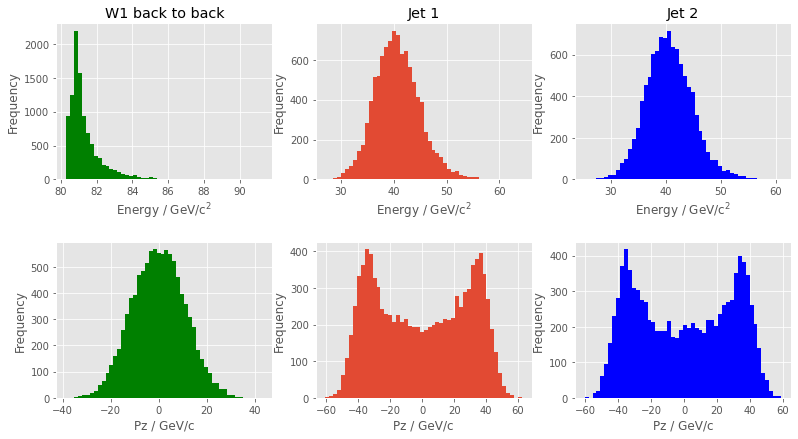

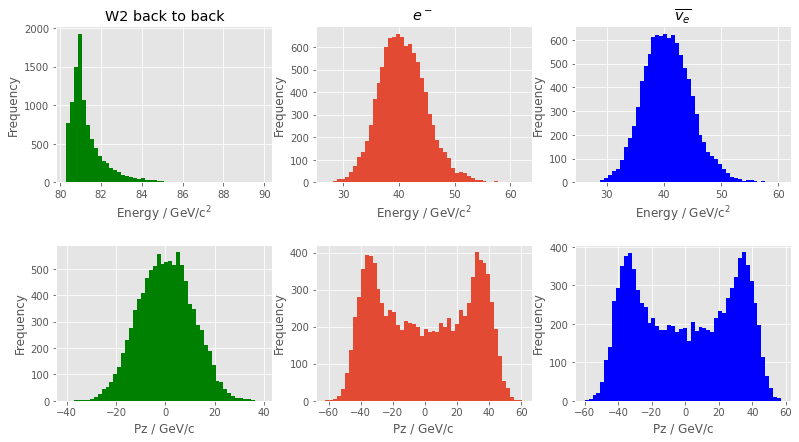

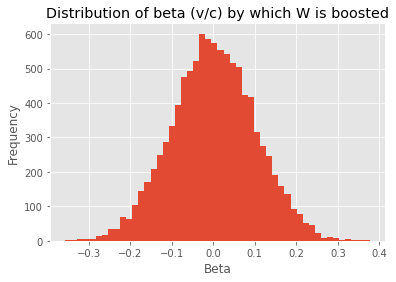

In [51]:
#W1 ~~~~~~~~~~~~~~
fig, ax = plt.subplots(2,3)
plt.subplots_adjust(left=0.0,bottom=0, right=1.7, top=1.3, wspace=0.2, hspace=0.4)

ax[0,0].hist(events[:,0,3], 50, color = 'g');
ax[0,1].hist(events[:,2,3], 50);
ax[0,2].hist(events[:,3,3], 50,color ='b');

ax[1,0].hist(events[:,0,2], 50,color = 'g');
ax[1,1].hist(events[:,2,2], 50);
ax[1,2].hist(events[:,3,2], 50,color ='b');

plt.setp(ax[0,:], xlabel='Energy / GeV/c$^2$')
plt.setp(ax[1,:], xlabel='Pz / GeV/c')
plt.setp(ax[:], ylabel='Frequency')
ax[0,0].title.set_text('W1 back to back')
ax[0,1].title.set_text('Jet 1')
ax[0,2].title.set_text('Jet 2')

#W2 ~~~~~~~~~~~~~~
fig, ax = plt.subplots(2,3)
plt.subplots_adjust(left=0.0,bottom=0, right=1.7, top=1.3, wspace=0.2, hspace=0.4)

ax[0,0].hist(events[:,1,3], 50, color = 'g');
ax[0,1].hist(events[:,4,3], 50);
ax[0,2].hist(events[:,5,3], 50,color ='b');

ax[1,0].hist(events[:,1,2], 50,color = 'g');
ax[1,1].hist(events[:,4,2], 50);
ax[1,2].hist(events[:,5,2], 50,color ='b');

plt.setp(ax[0,:], xlabel='Energy / GeV/c$^2$')
plt.setp(ax[1,:], xlabel='Pz / GeV/c')
plt.setp(ax[:], ylabel='Frequency')
ax[0,0].title.set_text('W2 back to back')
ax[0,1].title.set_text('$e^-$ ')
ax[0,2].title.set_text('$ \overline{v_e} $ ')

plt.figure()
plt.title('Distribution of beta (v/c) by which W is boosted')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.hist(beta, 50);